<a href="https://colab.research.google.com/github/Harman2607/psicov/blob/master/psicov2_Visualize%20Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the Git Repo for use

In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/Harman2607/psicov.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 49 (delta 4), reused 12 (delta 4), pack-reused 34
Unpacking objects: 100% (49/49), done.
/content/cloned-repo
bin	   demo.aln	  demo.pdb  psicov2_Harman.ipynb  src
CHANGELOG  demo.observed  LICENSE   README


Running the PSICOV Program and Saving the matrices generated

In [0]:
%%script bash
ls
cd src
echo '-------------------------'
ls
gcc -O3 -march=native -ffast-math -m64 -ftree-vectorize -fopenmp psicov2.c -lm -o psicov
./psicov -p -d 0.03 demo.aln > output

PRINTING 1 Lines of the generated file(matrix)

In [0]:
%%script bash
ls
cd src
echo '---------------------'
ls
# cat ./output

In [4]:
cd src

/content/cloned-repo/src


Printing some lines of the Matrix - many are seen to be close to 0


In [5]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
samplecovariancematrix = np.loadtxt('covariancematrix.txt' , dtype = 'd', delimiter = ' ')
print(samplecovariancematrix[0:10])
print(np.amax(samplecovariancematrix))

[[ 5.6e-05  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  5.5e-05  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  0.0e+00  5.5e-05 ...  3.0e-06  3.0e-06 -5.3e-05]
 ...
 [ 0.0e+00  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]
 [ 0.0e+00  0.0e+00  0.0e+00 ...  3.0e-06  3.0e-06 -5.3e-05]]
0.249935


### Sample Covariance Matrix

Heatmap for the Sample Covariance Matrix 
A good Heatmap isn't Obtained (Maybe because its the sample covariance matrix and not the actual covariance matrix)

<function matplotlib.pyplot.show>

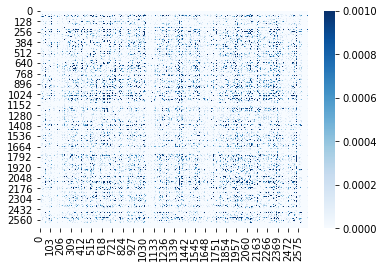

In [29]:
heatmap = sb.heatmap(samplecovariancematrix, 0 , 0.001 , cmap ='Blues')
plt.show

  Histogram Depicting Sparsity of sample covariance matrix

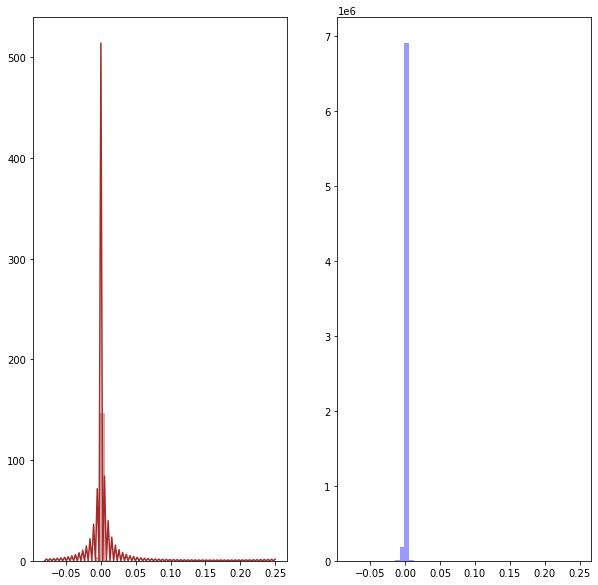

In [7]:
f, axes = plt.subplots(1,2, figsize =(10,10))
# With Kernal Estimation
sb.distplot(samplecovariancematrix, color = 'brown', ax = axes[0])

# Without Kernal estimation
sb.distplot(samplecovariancematrix, kde =False,color = 'blue', ax =axes[1])


# Covariance Matrix and Inverse Covariance Matrix Estimate
using graphical lasso

In [20]:
covMatEst= np.loadtxt('covmatrixestimate.txt' , dtype = 'd', delimiter = ' ')
InvcovMatEst= np.loadtxt('Inverse_covmatrixestimate.txt' , dtype = 'd', delimiter = ' ')

print(covMatEst[0:10])
print(InvcovMatEst[0:10])
print(np.amax(covMatEst))
print(np.amin(covMatEst))
print(np.amax(InvcovMatEst))
print(np.amin(InvcovMatEst))

[[1.e+09 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+09 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+09 ... 0.e+00 0.e+00 0.e+00]
 ...
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00]]
[[ 0. -0. -0. ... -0. -0. -0.]
 [-0.  0. -0. ... -0. -0. -0.]
 [-0. -0.  0. ... -0. -0. -0.]
 ...
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]
 [-0. -0. -0. ... -0. -0. -0.]]
1000000000.054252
-0.047984
56.534803
-10.454733


## #Heatmaps for the matrices - depicting the sparse nature of the matrices
Range of both Heatmaps are from -0.001 to +0.001
Dark Blue spots corresponds to values greater than 0.001



*   Max Absolute value element of Covariance Matrix = 1.e+09
*   Min Absolute value element of Covariance Matrix = -0.047

*   Max Absolute value element of Inv Covariance Matrix = 56
*   Min Absolute value element of Inv Covariance Matrix = -10




<function matplotlib.pyplot.show>

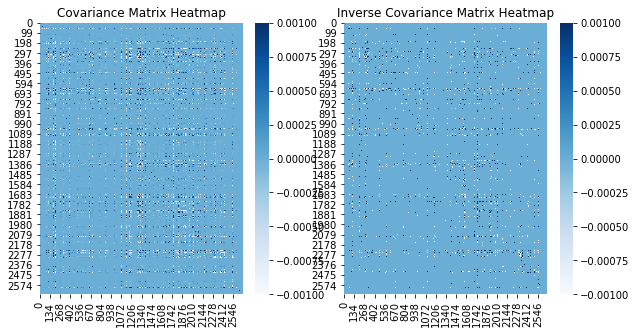

In [38]:
f, axes = plt.subplots(1,2 , figsize = (10,5))
# covariance estimate heatmap
heatmap = sb.heatmap(covMatEst, -0.001, 0.001 , cmap ='Blues' , ax = axes[0])
axes[0].title.set_text('Covariance Matrix Heatmap')

# inv covariance estimate heatmap
heatmap = sb.heatmap(InvcovMatEst, -0.001, 0.001,cmap ='Blues' , ax = axes[1])
axes[1].title.set_text('Inverse Covariance Matrix Heatmap')
plt.show

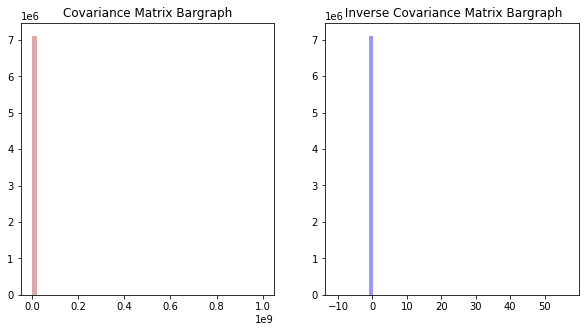

In [39]:
f, axes = plt.subplots(1,2, figsize =(10,5))
# covatiance estimate bar graph
sb.distplot(covMatEst, kde =False, color = 'brown', ax = axes[0])
axes[0].title.set_text('Covariance Matrix Bargraph')

# inverse covariance estimate bar graph
sb.distplot(InvcovMatEst, kde =False,color = 'blue', ax =axes[1])
axes[1].title.set_text(' Inverse Covariance Matrix Bargraph')

